In [1]:
from glob import glob
import pandas as pd

DATA_PATH = glob('/opt/ml/input/data/train/images/*/*') # 모든 train 이미지에 대한 경로를 리스트로 받아옵니다.

In [2]:
def age_group(x): # 김준재님 코드 참고
    return min(2, x // 30)

def preprocess_train_dataframe(total_train_images):

    new_train_df = pd.DataFrame(columns={"id", "gender", "race", "age", "mask", "img_path", "path"})
    total_id, total_gender, total_race, total_age, total_img_path, total_mask, total_folder = [], [], [], [], [], [], []

    for img_path in total_train_images:

        split_list = img_path.split("/")
        file_name = split_list[-1]
        path = split_list[-2]

        path_split = path.split("_")
        id_ = path_split[0]
        gender = 0 if path_split[1] == "male" else 1
        race = path_split[2]
        age = int(path_split[3])
        
        if "normal" in file_name:
            mask = 2
        elif "incorrect" in file_name:
            mask = 1
        else:
            mask = 0

        total_id.append(id_)
        total_gender.append(gender)
        total_race.append(race)
        total_age.append(age)
        total_mask.append(mask)
        total_img_path.append(img_path)
        total_folder.append(path)   

    new_train_df['id'] = total_id
    new_train_df['gender'] = total_gender
    new_train_df['race'] = total_race
    new_train_df['age'] = total_age
    new_train_df['mask'] = total_mask
    new_train_df['img_path'] = total_img_path
    new_train_df['path'] = total_folder
    
    # age group 생성
    new_train_df['age_group'] = new_train_df['age'].apply(lambda x : age_group(x))

    # label 생성 - 신규범님 코드 참고
    new_train_df['label'] = new_train_df['mask'] * 6 + new_train_df['gender']*3 + new_train_df['age_group']
    return new_train_df.sort_values(by='id').reset_index(drop=True)

new_train_df = preprocess_train_dataframe(DATA_PATH)

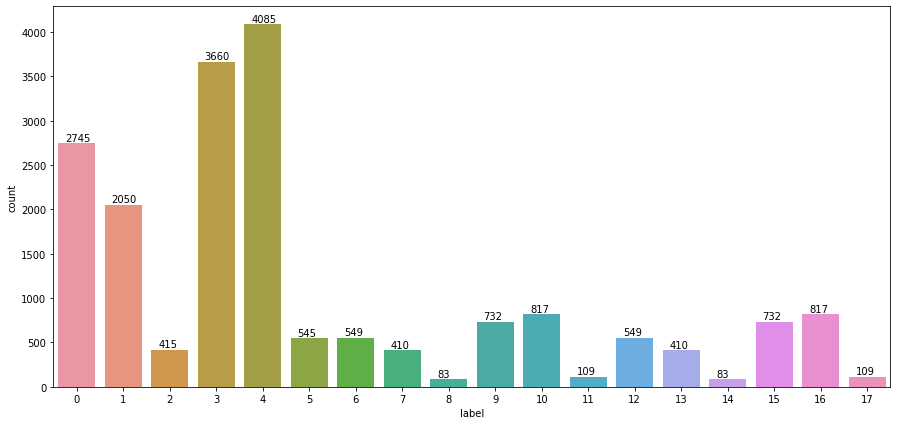

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax = sns.countplot(x="label", data=new_train_df, ax=ax)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+30))